In [1]:
import pandas as pd
file_path = 'elections.csv' 
data = pd.read_csv(file_path)
total_seats = data.groupby('Party')['Total'].sum().reset_index()
total_won = data['Won'].sum()
total_leading = data['Leading'].sum()
top_parties = total_seats.sort_values(by='Total', ascending=False).head(5)

print("Top 5 Parties with Most Seats in 2024:")
print(top_parties)

Top 5 Parties with Most Seats in 2024:
                                  Party  Total
8          Bharatiya Janata Party - BJP    240
15       Indian National Congress - INC     99
31                 Samajwadi Party - SP     37
4   All India Trinamool Congress - AITC     29
12      Dravida Munnetra Kazhagam - DMK     22


In [2]:
file_path = 'Bharatiya Janata Party - BJP.csv'
df = pd.read_csv(file_path)
max_votes_row = df[df['Total Votes'] == df['Total Votes'].max()]
min_votes_row = df[df['Total Votes'] == df['Total Votes'].min()]
max_votes_info = max_votes_row[['Parliament Constituency', 'Winning Candidate', 'Total Votes']].iloc[0]
min_votes_info = min_votes_row[['Parliament Constituency', 'Winning Candidate', 'Total Votes']].iloc[0]

print("BJP Constituency with Highest Total Votes:")
print(f"Constituency: {max_votes_info['Parliament Constituency']}")
print(f"Candidate: {max_votes_info['Winning Candidate']}")
print(f"Votes: {max_votes_info['Total Votes']}")
print()

print("BJP Constituency with Lowest Total Votes:")
print(f"Constituency: {min_votes_info['Parliament Constituency']}")
print(f"Candidate: {min_votes_info['Winning Candidate']}")
print(f"Votes: {min_votes_info['Total Votes']}")

results = pd.DataFrame({
    'Metric': ['Highest Total Votes', 'Lowest Total Votes'],
    'Parliament Constituency': [max_votes_info['Parliament Constituency'], min_votes_info['Parliament Constituency']],
    'Winning Candidate': [max_votes_info['Winning Candidate'], min_votes_info['Winning Candidate']],
    'Total Votes': [max_votes_info['Total Votes'], min_votes_info['Total Votes']]
})

results.to_csv('BJP_Constituency_Analysis.csv', index=False)


BJP Constituency with Highest Total Votes:
Constituency: Malkajgiri(7)
Candidate: EATALA RAJENDER
Votes: 991042

BJP Constituency with Lowest Total Votes:
Constituency: Surat(24)
Candidate: MUKESHKUMAR CHANDRAKAANT DALAL (Uncontested)
Votes: -


In [3]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

top_5_margin_candidates = df.sort_values(by='Margin', ascending=False).head(5)

print("Top 5 Winning Candidates with the Highest Margin in BJP:")
for idx, row in top_5_margin_candidates.iterrows():
    print(f" {row['Winning Candidate']} with {row['Margin']} margin. ")


Top 5 Winning Candidates with the Highest Margin in BJP:
 SHANKAR LALWANI with 1175092.0 margin. 
 SHIVRAJ SINGH CHOUHAN with 821408.0 margin. 
 C R PATIL with 773551.0 margin. 
 AMIT SHAH with 744716.0 margin. 
 BIPLAB KUMAR DEB with 611578.0 margin. 


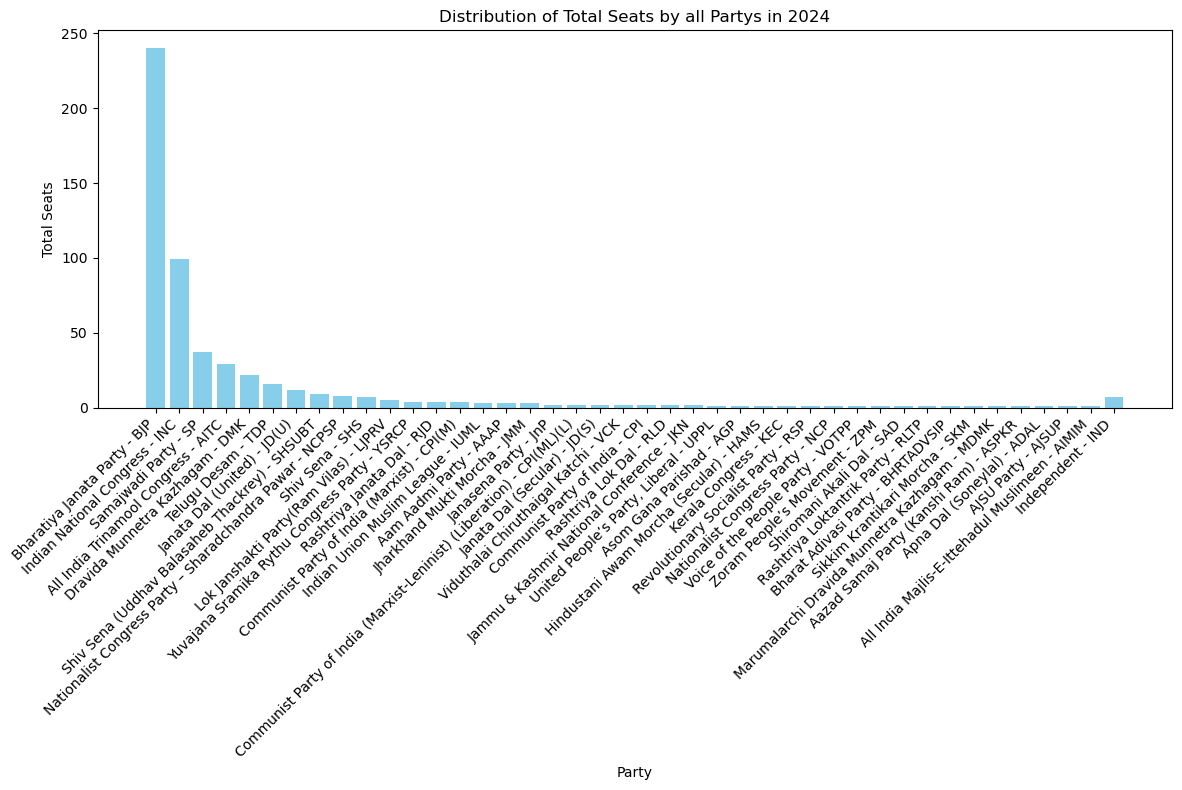

In [4]:
import matplotlib.pyplot as plt
party_names = data['Party']
total_seats = data['Total']

plt.figure(figsize=(12, 8))
plt.bar(party_names, total_seats, color='skyblue')

plt.xlabel('Party')
plt.ylabel('Total Seats')
plt.title('Distribution of Total Seats by all Partys in 2024')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [5]:

file_path = 'Indian National Congress - Sheet1.csv' 
dt = pd.read_csv(file_path)

max_votes_row = dt[dt['Total Votes'] == dt['Total Votes'].max()]

min_votes_row = dt[dt['Total Votes'] == dt['Total Votes'].min()]

max_votes_info = max_votes_row[['Parliament Constituency', 'Winning Candidate', 'Total Votes']].iloc[0]
min_votes_info = min_votes_row[['Parliament Constituency', 'Winning Candidate', 'Total Votes']].iloc[0]

print("Indian National Congress With Highest Votes:")
print(f"Constituency: {max_votes_info['Parliament Constituency']}")
print(f"Candidate: {max_votes_info['Winning Candidate']}")
print(f"Votes: {max_votes_info['Total Votes']}")
print()

print("Indian National Congress with Lowest Votes:")
print(f"Constituency: {min_votes_info['Parliament Constituency']}")
print(f"Candidate: {min_votes_info['Winning Candidate']}")
print(f"Votes: {min_votes_info['Total Votes']}")



Indian National Congress With Highest Votes:
Constituency: Dhubri (2)
Candidate: RAKIBUL HUSSAIN
Votes: 1471885

Indian National Congress with Lowest Votes:
Constituency: Lakshadweep(1)
Candidate: MUHAMMED HAMDULLAH SAYEED
Votes: 25726


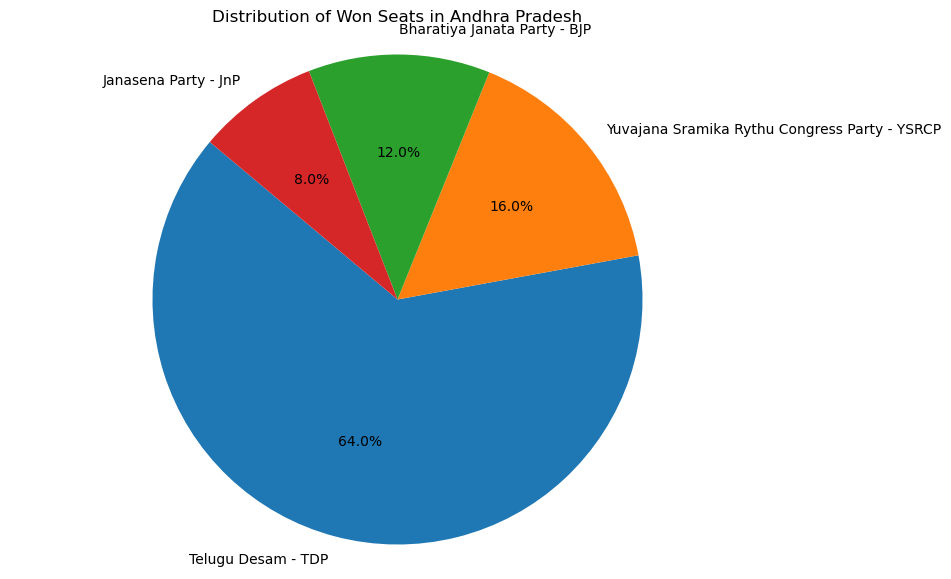

In [6]:
file_path = 'AndhraPradesh.csv' 
dd = pd.read_csv(file_path)

party_names = dd['Party']
won_seats = dd['Won']

plt.figure(figsize=(10, 7))
plt.pie(won_seats, labels=party_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Won Seats in Andhra Pradesh')
plt.axis('equal') 
plt.show()


In [7]:
files = ['TamilNadu.csv','karnataka.csv','AndhraPradesh.csv','kerala.csv','telangana.csv']
leading_parties = {}

for file in files:
    dataa = pd.read_csv(file)
    results = dataa.groupby('Party')['Won'].sum()
    leading_party = results.idxmax()
    leading_seats = results.max()
    state_name = file.split('.')[0] 
    leading_parties[state_name] = (leading_party, leading_seats)

print("leading partys in South Indian States: ")
for state, (party, seats) in leading_parties.items():
    print(f" {state} : {party} with {seats} seats.")

leading partys in South Indian States: 
 TamilNadu : Dravida Munnetra Kazhagam - DMK with 22 seats.
 karnataka : Bharatiya Janata Party - BJP with 17 seats.
 AndhraPradesh : Telugu Desam - TDP with 16 seats.
 kerala : Indian National Congress - INC with 14 seats.
 telangana : Bharatiya Janata Party - BJP with 8 seats.


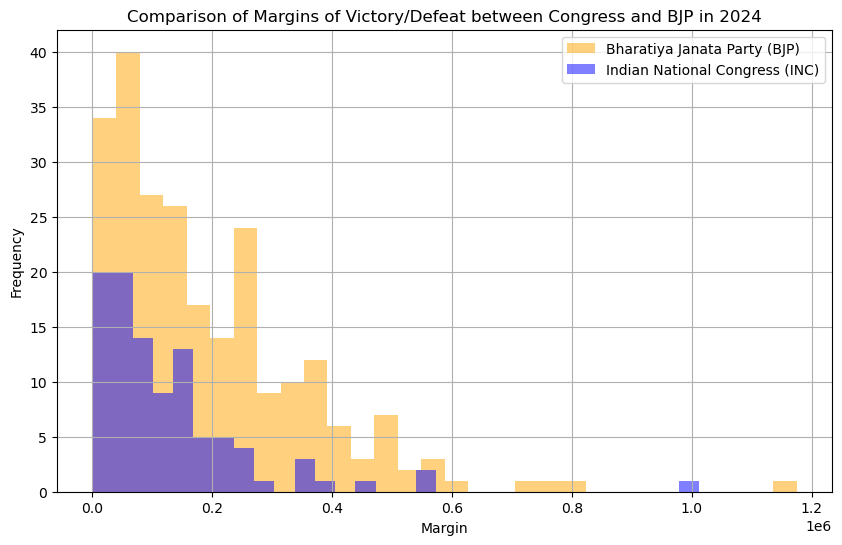

In [8]:
congress_margins = dt['Margin']
bjp_margins = df['Margin']
plt.figure(figsize=(10, 6))

plt.hist(bjp_margins, bins=30, alpha=0.5, color='orange', label='Bharatiya Janata Party (BJP)')
plt.hist(congress_margins, bins=30, alpha=0.5, color='blue', label='Indian National Congress (INC)')

plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.title('Comparison of Margins of Victory/Defeat between Congress and BJP in 2024')
plt.legend()

plt.grid(True)
plt.show()

In [9]:
file_path = 'tdp.csv'
datas = pd.read_csv(file_path)

# Calculate the product of 'Total Votes' and 'Margin'
datas['Votes_Margin_Product'] = datas['Total Votes'] * datas['Margin']

# Identify the row with the highest product
max_product_row = datas.loc[datas['Votes_Margin_Product'].idxmax()]

# Extract the winning candidate and parliament constituency
winning_candidate = max_product_row['Winning Candidate']
parliament_constituency = max_product_row['Parliament Constituency']

# Print the results
print(f"Winning Candidate with high votes and large margin is {winning_candidate} from the {parliament_constituency} constituency.")


Winning Candidate with high votes and large margin is SRIBHARAT MATHUKUMILI from the Visakhapatnam(4) constituency.


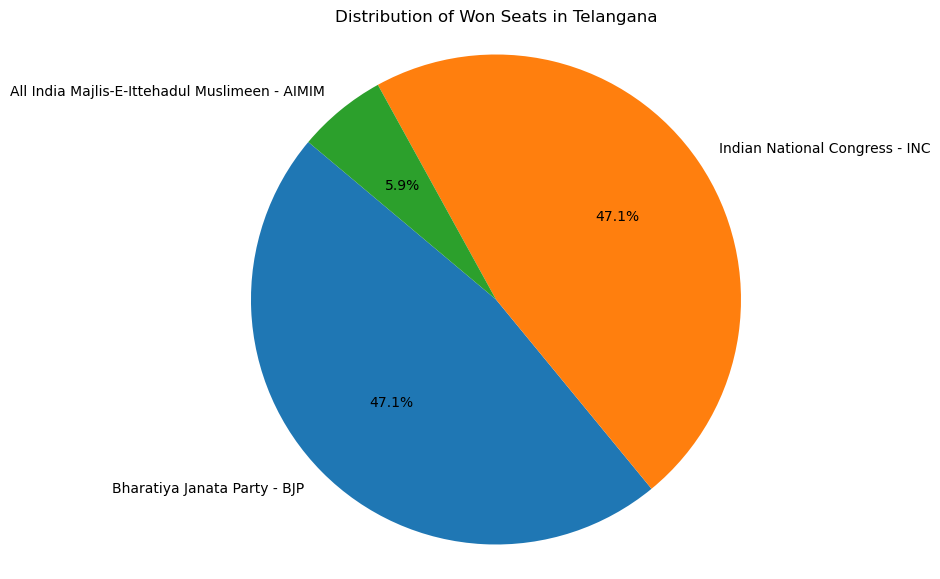

In [10]:
file_path = 'telangana.csv' 
dd = pd.read_csv(file_path)

party_names = dd['Party']
won_seats = dd['Won']

plt.figure(figsize=(10, 7))
plt.pie(won_seats, labels=party_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Won Seats in Telangana')

plt.axis('equal') 
plt.show()